### Objective:
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

### Instructions:
* Download the wine dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Wine).
* Load the dataset into a Pandas dataframe.
* Split the dataset into features and target variables.
* Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
* Implement PCA on the preprocessed dataset using the scikit-learn library.
* Determine the optimal number of principal components to retain based on the explained variance ratio.
* Visualise the results of PCA using a scatter plot.
* Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
* Interpret the results of PCA and clustering analysis.

### Deliverables:
* Jupyter notebook containing the code for the PCA implementation.
* A report summarising the results of PCA and clustering analysis.
* Scatter plot showing the results of PCA.
* A table showing the performance metrics for the clustering algorithm.

In [31]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [32]:
with open('wine.names', 'r') as f:
    content = f.read()
    print(content)

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [33]:
df = pd.read_csv("wine.data",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [34]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [36]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [37]:
df[0].value_counts()

2    71
1    59
3    48
Name: 0, dtype: int64

In [38]:
## First attribute is class identifier so we will now split the features
## y is the dependent feature
X = df.drop(labels= [0],axis=1)
y = df[0]

In [39]:
X.shape , y.shape

((178, 13), (178,))

In [40]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [41]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [42]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((133, 13), (45, 13), (133,), (45,))

In [43]:
#Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
pca = PCA()
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_train_scaled_pca

array([[-2.50373583, -1.01795324,  0.99055159, ..., -0.15437127,
         0.01404648, -0.01277848],
       [-0.78727169,  2.21838131, -1.74715012, ...,  1.17735552,
         0.4941074 ,  0.34523029],
       [ 1.099291  ,  0.99475135,  2.98166426, ..., -0.08400822,
        -0.03316934,  0.14280344],
       ...,
       [-4.22816937, -2.35649864, -1.07552406, ...,  0.04572533,
        -0.1742982 , -0.06667198],
       [ 1.83161653,  1.51738866, -0.17305158, ..., -0.76505932,
        -0.34399113,  0.33623177],
       [ 0.13126756,  1.26353397,  0.9457923 , ..., -0.35462666,
         0.04638795, -0.27430872]])

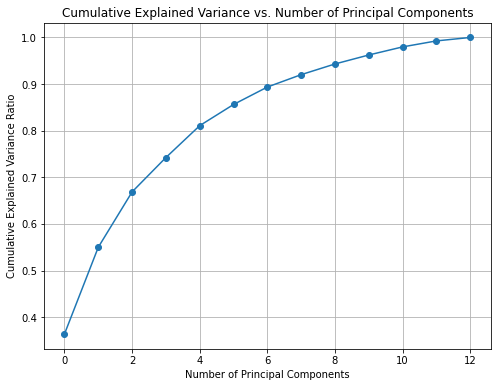

In [45]:
# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [46]:
cumulative_variance_ratio

array([0.3639525 , 0.55012983, 0.66877657, 0.74251108, 0.81090127,
       0.85628018, 0.89370722, 0.92026451, 0.94319162, 0.96244165,
       0.9797918 , 0.99264802, 1.        ])

In [47]:
pca.explained_variance_ratio_

array([0.3639525 , 0.18617733, 0.11864674, 0.07373451, 0.06839018,
       0.04537892, 0.03742704, 0.02655729, 0.02292711, 0.01925003,
       0.01735015, 0.01285622, 0.00735198])

### Observation:
* Based on the above plot and the values we observe after 6 number of principal components there is a neglible change/very little change in variance captured compared to the previous principal components so retaining 6 components would be ideal in this scenario

* Since we have to plot scatterplot the point must be in 2-d as per the question

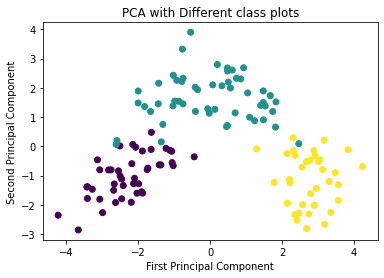

In [48]:
#Visualising the results of PCA using a scatter plot
plt.scatter(X_train_scaled_pca[:,0], X_train_scaled_pca[:,1],c=y_train,cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA with Different class plots')
plt.show()

In [49]:
from warnings import filterwarnings
filterwarnings("ignore")

In [50]:
#Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

#Using Elbow Method to calculate k value
wcss = []                       # Within-Cluster Sum of Squares (WCSS) for each k.
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    
wcss

[12462637.466097387,
 3180882.546622191,
 1615357.3439364803,
 903613.0733435024,
 642882.1872523668,
 458462.52336118673,
 299755.29911853577,
 232622.86460854637,
 189103.5175729511,
 154474.4842297549]

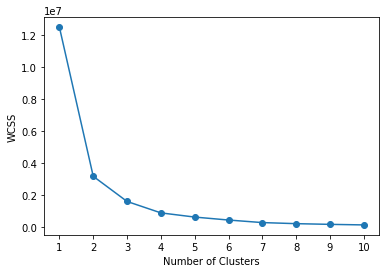

In [51]:
#plot elbow curve
plt.plot(range(1,11),wcss, marker='o', linestyle='-')
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

#### Observation
Based on this graph we must keep the optimal value of k as 3

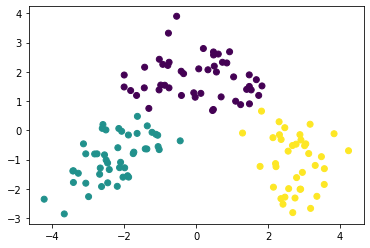

In [52]:
kmeans = KMeans(n_clusters=3,init='k-means++')
y_labels = kmeans.fit_predict(X_train_scaled_pca)
plt.scatter(X_train_scaled_pca[:,0], X_train_scaled_pca[:,1],c=y_labels)

In [53]:
print(f"Silhouette Score: {silhouette_score(X_train_scaled_pca,y_labels)}")

Silhouette Score: 0.28540652428912866


### Observation
* Finally we have seperated them into clusters by implementing k-means clustering
* The number of clusters taken was 3 as it was found by using the elbow graph
* kmean++ was used for initialization as it makes sure that the centeroids initiatized at the starting are at maximum distance from other centeroid as initializing of centeriod plays a major role in the formation of cluster.